In [45]:
%load_ext autoreload
%autoreload 2
import weights_loader
from kernels import *
import numpy as np
from PIL import Image
import os
import matplotlib.cm as cm
from dims_reduction import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load the first-layer conv2d weights
weights = weights_loader.load_weights()

# Display the list of models with number of output channels
for model_name, model_weights in weights.items():
    out_channels = model_weights.shape[0]
    print(f'{out_channels} - {model_name}')

32 - efficientnet_b0
24 - efficientnet_v2_m
40 - efficientnet_b3
64 - efficientnet_b7
24 - quantized_shufflenet_v2_x2_0
24 - efficientnet_v2_s
32 - efficientnet_b1
16 - mobilenet_v3_large
48 - efficientnet_b5
64 - squeezenet1_1
32 - mobilenet_v2
16 - ssdlite320_mobilenet_v3_large
24 - shufflenet_v2_x2_0
16 - quantized_mobilenet_v3_large
32 - efficientnet_v2_l
32 - inception_v3
16 - fasterrcnn_mobilenet_v3_large_320_fpn
24 - shufflenet_v2_x1_5
32 - regnet_y_8gf
32 - regnet_x_800mf
24 - shufflenet_v2_x0_5
16 - fasterrcnn_mobilenet_v3_large_fpn
32 - regnet_x_8gf
64 - maxvit_t
24 - quantized_shufflenet_v2_x0_5
32 - mnasnet1_0
24 - quantized_shufflenet_v2_x1_0
16 - mnasnet0_5
32 - quantized_mobilenet_v2
16 - mobilenet_v3_small
32 - regnet_x_1_6gf
48 - efficientnet_b4
32 - regnet_x_400mf
32 - regnet_y_128gf
24 - mnasnet0_75
32 - regnet_x_16gf
24 - shufflenet_v2_x1_0
32 - efficientnet_b2
16 - deeplabv3_mobilenet_v3_large
32 - regnet_x_3_2gf
32 - regnet_y_400mf
32 - regnet_y_800mf
56 - efficie

In [6]:
# Create an image representing each model's learned weights
img_out_dir_name = './data/images'
if not os.path.exists(img_out_dir_name):
    os.makedirs(img_out_dir_name)

for model_name, model_weights in weights.items():
    filename = f'{img_out_dir_name}/{model_name}.png'
    if os.path.exists(filename):
        continue
    weights_grid_rgb = kernels_to_rgb_grid(model_weights)
    weights_grid_img = Image.fromarray(weights_grid_rgb)
    weights_grid_img.save(filename)

In [44]:
import matplotlib.cm as cm
colours = cm.rainbow(np.linspace(0, 1, len(weights)))
all_colours = []
all_weights = []
for (model_name, model_weights), colour in zip(weights.items(), colours):
    all_weights.extend(model_weights)
    all_colours.extend([colour] * len(model_weights))
all_weights = np.array(all_weights)

/home/richard/work/github_pages/learned-vision/.venv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


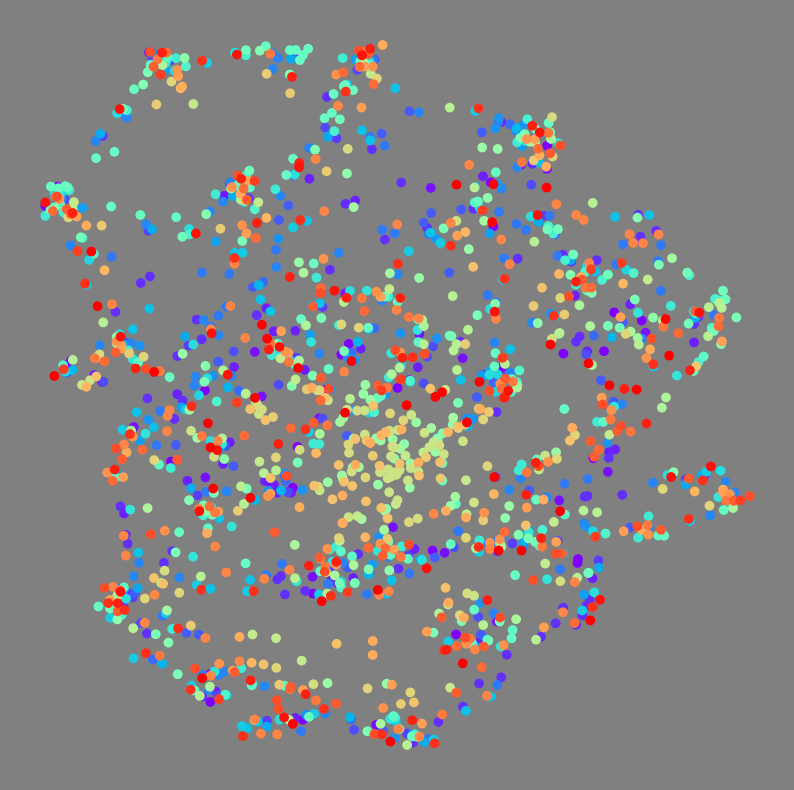

In [50]:
data = np.reshape(all_weights, (all_weights.shape[0], -1))
y, x = umap_fit_transform(data=data, random_state=0, n_neighbors=250, metric='cosine', min_dist=0.25)
plot_embeddings(x, y, all_colours)